In [1]:
import numpy as np
import skimage.io as skio
import skimage.transform as skit

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def px_neighbors(img, dist=1, n_pairs=-1):
    indices = np.arange(img.size)
    np.random.shuffle(indices)
    if n_pairs > 0:
        indices = indices[:n_pairs]
    x1, x2 = [], []
    for idx in indices:
        row, col = np.unravel_index(idx, img.shape)
        if row + dist < img.shape[0]:
            x1.append(img[row, col])
            x2.append(img[row + dist, col])
        if col + dist < img.shape[1]:
            x1.append(img[row, col])
            x2.append(img[row, col + dist])
    return x1, x2

In [3]:
def gaussian(x, mu=0, sigma=1):
    return np.exp(-(x-mu)**2 / (2*sigma**2))

In [4]:
img = skio.imread('anteater.jpg', as_grey=True)

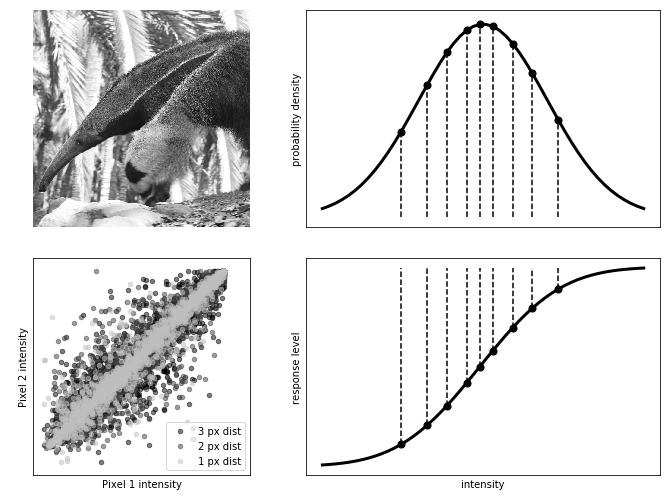

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Show image:
ax[0][0].imshow(img, cmap='gray')
ax[0][0].axis('off')

# Calculate pixel distances:
for dist, gray in zip([3, 2, 1], [0, 0.25, 0.75]):
    ax[1][0].scatter(*px_neighbors(img, dist=dist, n_pairs=1000),
                     alpha=0.5, s=20,
                     c=(gray, gray, gray),
                     label='%d px dist' % dist)
    ax[1][0].axis('square')
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].legend(loc='lower right')
ax[1][0].set_xlabel('Pixel 1 intensity')
ax[1][0].set_ylabel('Pixel 2 intensity')


x = np.linspace(0, 1, num=50)
y_prob = gaussian(x, mu=0.5, sigma=0.2)
y_resp = np.cumsum(y_prob)
y_resp /= np.max(y_resp)

ax[0][1].plot(x, y_prob, 'k', linewidth=3)
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])
ax[0][1].set_ylabel('probability density')

ax[1][1].plot(x, y_resp, 'k', linewidth=3)
ax[1][1].set_xticks([])
ax[1][1].set_yticks([])
ax[1][1].set_ylabel('response level')
ax[1][1].set_xlabel('intensity')

for y0 in np.arange(0.1, 1, 0.1):
    idx = np.argmin((y_resp - y0) ** 2)
    ax[0][1].plot([x[idx], x[idx]], [0, y_prob[idx]], 'k--')
    ax[0][1].scatter(x[idx], y_prob[idx], c='k', s=50)
    ax[1][1].scatter(x[idx], y_resp[idx], c='k', s=50)
    ax[1][1].plot([x[idx], x[idx]], [y_resp[idx], 1], 'k--')

fig.tight_layout()
fig.savefig('fig2-ech.pdf', transparent=True)